In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv('final_data.csv')

In [15]:
# Separate features and labels
X = df.drop('label', axis=1)
y = df['label']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [9]:
# Random Forest with Grid Search
rf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 200]},
             scoring='f1_macro')

In [12]:
# Evaluate
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

                           precision    recall  f1-score   support

                   Benign       0.94      0.89      0.91     19110
                      C&C       1.00      0.35      0.52     19376
                      DoS       0.86      1.00      0.93     19100
             FileDownload       1.00      1.00      1.00     18955
PartOfAHorizontalPortScan       0.61      0.94      0.74     19086

                 accuracy                           0.83     95627
                macro avg       0.88      0.84      0.82     95627
             weighted avg       0.88      0.83      0.82     95627

Accuracy Score: 0.833561650998149


In [16]:
# Accuracy in percentage
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy Score: {accuracy:.2f}%")

Accuracy Score: 83.36%


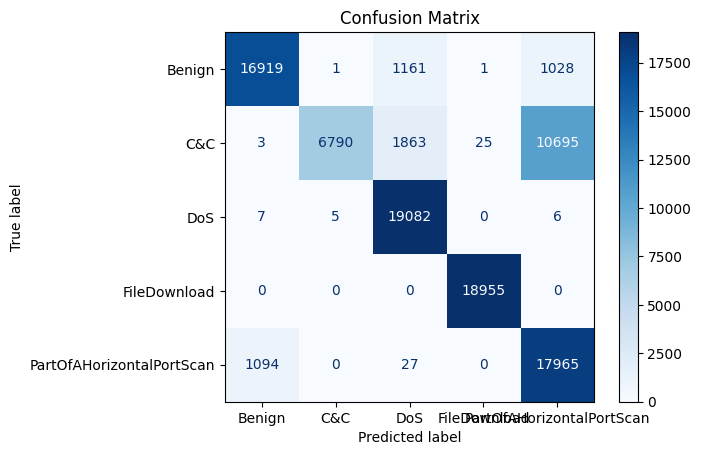

In [17]:
# Detailed confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_resampled, y_resampled, cv=5, n_jobs=-1)


In [ ]:
# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [14]:
import joblib
joblib.dump(rf, 'random_forest_model.joblib')

['random_forest_model.joblib']